In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time
import tensorflow as tf
import tensorflow_datasets as tfds 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, InputLayer, Flatten, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

**Data Loading**

In [3]:
dataset, dataset_info = tfds.load('malaria',with_info=True,as_supervised=True,shuffle_files=True)

I0000 00:00:1745323153.027642  104927 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2131 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [33]:
print(type(dataset))
print(type(dataset['train']))
print(type(dataset['train'].take(1)))
print(type(dataset_info.features['label']))

<class 'dict'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.take_op._TakeDataset'>
<class 'tensorflow_datasets.core.features.class_label_feature.ClassLabel'>


In [5]:
print(len(dataset))
print(len(dataset['train']))
print(len(dataset['train'].take(1)))

1
27558
1


In [30]:
dataset_info.features['label'].int2str(0)

'parasitized'

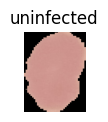

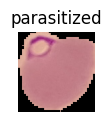

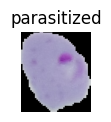

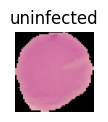

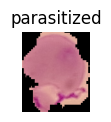

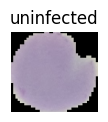

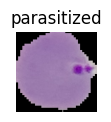

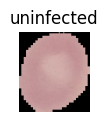

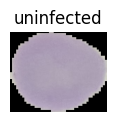

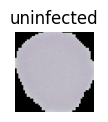

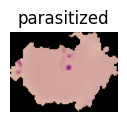

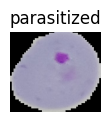

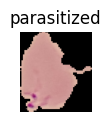

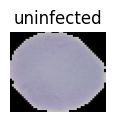

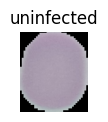

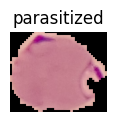

In [41]:
for image in dataset['train'].take(16):
    plt.subplot(4,4,1)
    plt.imshow(image[0])
    plt.title(dataset_info.features['label'].int2str(image[1]))
    plt.axis("off")
    plt.show()

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.fr

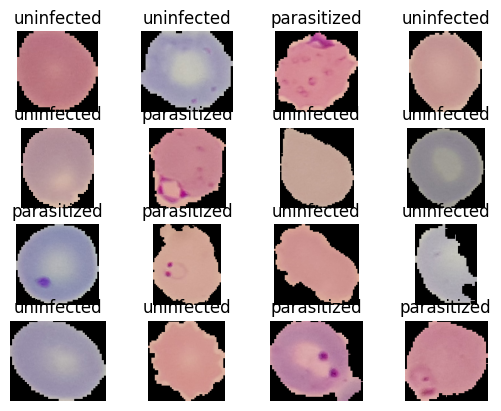

In [45]:
for i, (image,label) in enumerate(dataset['train'].take(16)): #enumurate gives both current index value and actual value
    ax= plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis("off")
    print(type(image),type(label))